In [1]:
import os

In [2]:
file_path = r'C:\Users\saket\Desktop\courses\TF\cell_images'

In [3]:
os.listdir(file_path)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread
## Allows reading images

In [6]:
test_path = file_path+'\\test\\'
train_path = file_path+'\\train\\'

In [7]:
test_path

'C:\\Users\\saket\\Desktop\\courses\\TF\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
image_path = os.listdir(train_path+'parasitized')[1]

(208, 148, 3)


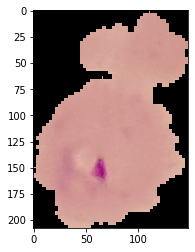

In [14]:
para_cel = train_path+'parasitized\\'+image_path
plt.imshow(imread(para_cel))
print(imread(para_cel).shape)

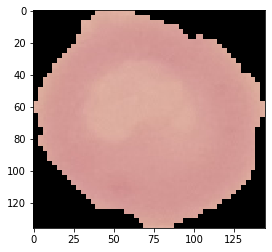

In [12]:
image_path = os.listdir(train_path+'uninfected')[1]
un_cel = train_path+'uninfected\\'+image_path
plt.imshow(imread(un_cel))

In [14]:
## The size of the images will be different in real life datasets. 
## So you need to get the average image size.
dim1 = []
dim2 = []

for image_file in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_file)
    d1,d2,colors = img.shape ## hieght, width,color channel
    dim1.append(d1)
    dim2.append(d2)

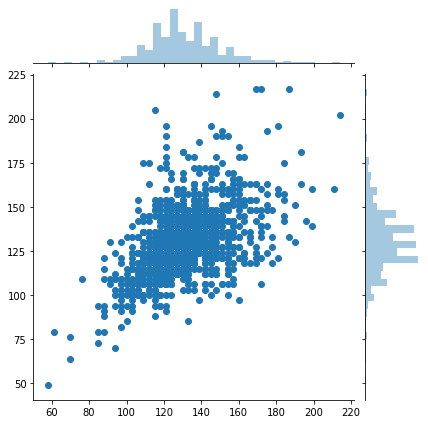

In [16]:
sns.jointplot(dim1,dim2)

In [17]:
## CNN will not be able to train on varying image sizes. You need to make sure that you resize the images to 
##be in the same size
## Average out the sizes

np.mean(dim1)


130.92538461538462

In [18]:
image_shape = (130,130,3)

In [19]:
''' With the increase in image sizes and colors, the data points increase. 
 Pusshing this directly will be computationaly expensive so you need to pass these as batches.'''

50700

In [20]:
## Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range = 20,width_shift_range=0.1,
                              height_shift_range=0.1,shear_range=0.1,
                              zoom_range=0.1,horizontal_flip=True,
                              fill_mode='nearest')

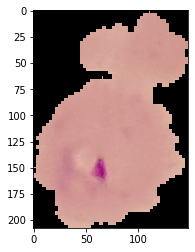

In [28]:
plt.imshow(imread(para_cel))

In [31]:
para = plt.imread(para_cel)

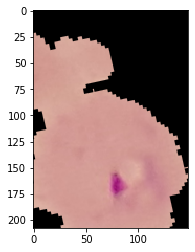

In [36]:
plt.imshow(image_gen.random_transform(para))

In [37]:
## Augmenting the dataset with transformed images.
## This helps in increasing the dataset size.

## Setting up flow batches from the directory
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [41]:
## Creating the model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3),
                input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64,kernel_size = (3,3),
                input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64,kernel_size = (3,3),
                input_shape = image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early = EarlyStopping(monitor = 'val_loss',patience = 2)

In [47]:
batch_size = 16

In [48]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle = False)

Found 2600 images belonging to 2 classes.


In [52]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                             validation_data = test_image_gen,
                             callbacks = [early])

In [54]:
from tensorflow.keras.models import load_model

In [56]:
model = load_model(r'C:\Users\saket\Desktop\courses\TF\TF_2_Notebooks_and_Data\04-CNNs\malaria_detector.h5')

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [58]:
model.evaluate_generator(test_image_gen)

[1.944904133951737, 0.8707692]

In [59]:
pred = model.predict_generator(test_image_gen)

In [60]:
predictions = pred>0.5

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.86      2600
weighted avg       0.89      0.87      0.86      2600



In [63]:
## Predicting on a single image
from tensorflow.keras.preprocessing import image

In [65]:
x = image.load_img(para_cel,target_size=image_shape)

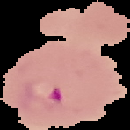

In [66]:
x

In [67]:
## Transform the image to array
arr = image.img_to_array(x)

In [69]:
arr.shape

(130, 130, 3)

In [71]:
## You need to convert it to (1,130,130,3). As the model expects a batch of images along a single axis
x = np.expand_dims(x,axis = 0)

In [75]:
x.astype('float')

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [76]:
model.predict(x.astype('float'))

array([[0.]], dtype=float32)

In [77]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}